Name: Abdelazim Lokma 



In this notebook, I will be performing a preliminary analysis on the BU Daily Weights excel sheet. My main goal is to try to extract some usefull information relating to how tonnage, which is the one of the main features of this dataset, relates to temperature. 

Importing weather data from VisualCrossing API enpoint:


Datatypes:

WSF2 - Fastest 2-minute wind speed

TAVG - Average Temperature

TMIN - Minimum temperature

TMAX - Maximum temperature

WDF2 - Direction of fastest 2-minute wind

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather_data = pd.read_csv('/Users/abdelazimlokma/Downloads/3247190.csv')

daily_weights = pd.read_csv(
    '/Users/abdelazimlokma/Downloads/BU Daily Weights FY22.xlsx - Sheet2 (1).csv')

weather_data = weather_data[weather_data["NAME"] == "BOSTON LOGAN INTERNATIONAL AIRPORT, MA US"]

weather_data = weather_data.dropna(thresh=len(weather_data) - 1, axis=1)

weather_data['DATE'] = pd.to_datetime(weather_data["DATE"])

weather_data["DATE"] = weather_data["DATE"].dt.strftime('%-m/%-d/%Y')

weather_data = weather_data.rename(columns={"DATE": 'Date'})

daily_weights = daily_weights.rename(columns={"Work Order Date": 'Date'})

merged_df = pd.merge(weather_data, daily_weights, on='Date', how='inner')


merged_df = merged_df.drop(['NAME', 'STATION'], axis=1)

display(merged_df)


,Date,AWND,TAVG,TMAX,TMIN,WDF2,WSF2,Customer Key,Location,Address,Material,Tons
0,7/1/2021,4.0,25.4,29.4,20.0,220.0,7.6,31903.0,BU #75 - College of Health,635 Commonwealth Ave,Recycling,0.0300
1,7/2/2021,6.3,18.3,20.6,15.0,50.0,9.8,31950.0,BU #99 - College of Fine Arts,855 COMMONWEALTH AVE,Recycling,0.0800
2,7/6/2021,6.6,24.9,33.3,20.6,270.0,12.5,31769.0,BU #2 - Student Village,10 BUICK STREET,Recycling,0.5670
3,7/6/2021,6.6,24.9,33.3,20.6,270.0,12.5,31946.0,BU #95 - 80 Ivy,80 IVY ST,Trash,0.0470
4,7/6/2021,6.6,24.9,33.3,20.6,270.0,12.5,32111.0,BU MED- 815 Albany,815 Albany Street,Compost,0.0725
...,...,...,...,...,...,...,...,...,...,...,...,...
17798,6/30/2022,4.6,22.9,28.3,19.4,320.0,8.9,32111.0,BU MED- 815 Albany,815 Albany Street,Recycling,0.0000
17799,6/30/2022,4.6,22.9,28.3,19.4,320.0,8.9,32450.0,BU MED- 635 Albany Street,635 Albany Street,Recycling,0.0250
17800,6/30/2022,4.6,22.9,28.3,19.4,320.0,8.9,32493.0,BU MED- 715 Albany,715 Albany Street,Recycling,0.0580
17801,6/30/2022,4.6,22.9,28.3,19.4,320.0,8.9,32494.0,BU MED- 715 Albany West,715 Albany Street,Recycling,0.0555


Currently concerned mainly with finding a connection between outside temperature and tonnage. First I plotted the temperature with relation to the date in order to see how temperature changes throughout the year.

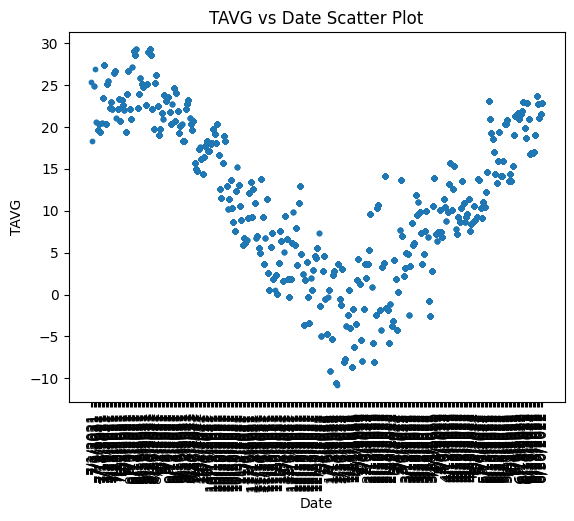

In [3]:
temp_date = merged_df[["Date", "TAVG"]]

temp_date.shape



plt.scatter(temp_date['Date'], temp_date['TAVG'], s=10)

plt.xticks(rotation=90)



# Set the labels for X and Y axis
plt.xlabel('Date')
plt.ylabel('TAVG')
plt.title('TAVG vs Date Scatter Plot')

plt.show()


The code below is my attempt to plot tonnage with relation to the date. My hope was to find a similar behavior with how the tonnage changes based on the date. But the plot below does not clearly show anything. 

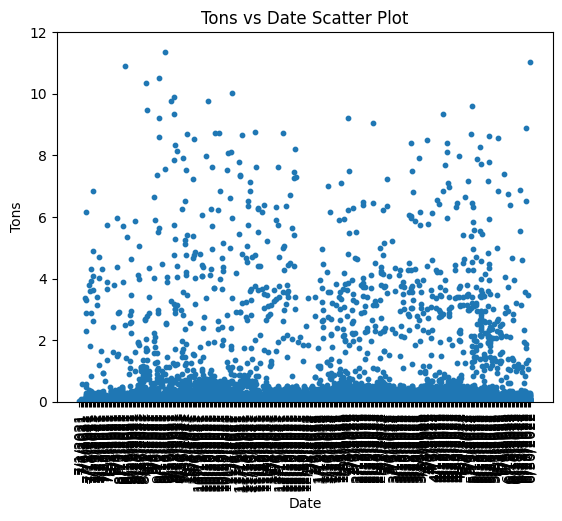

In [4]:
weight_date = merged_df[["Date", "Tons"]]

weight_date.shape


plt.scatter(weight_date['Date'], weight_date['Tons'], s=10)

plt.xticks(rotation=90)


# Set the labels for X and Y axis
plt.xlabel('Date')
plt.ylabel('Tons')
plt.title('Tons vs Date Scatter Plot')
plt.ylim(0, 12)

plt.show()


Decided to plot tonnage with relation to average daily temperature for a cleaner scatter plot. Still no clear correlation

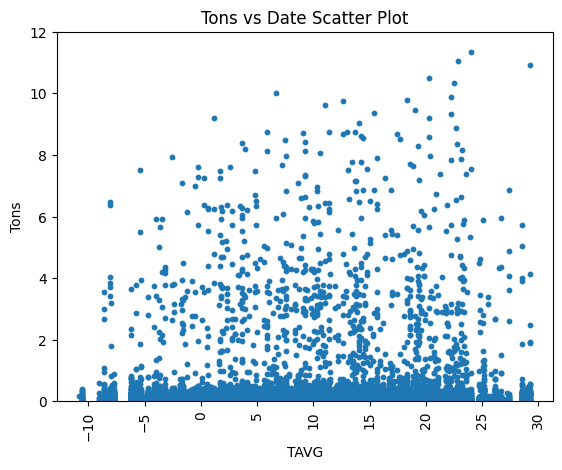

In [5]:
weight_date = merged_df[["TAVG", "Tons"]]

weight_date.shape


plt.scatter(weight_date['TAVG'], weight_date['Tons'], s=10)

plt.xticks(rotation=90)


# Set the labels for X and Y axis
plt.xlabel('TAVG')
plt.ylabel('Tons')
plt.title('Tons vs Date Scatter Plot')
plt.ylim(0, 12)

plt.show()


Now I plan to use K-Means to hopefully find a pattern in the data that may have not been apparent at first. But to do this, I first need to find the optimal number of clusters to use for K-Means. So I will apply k means to a range of K values, then I will measure and plot the silhouette score generated by each k in order to find the highest score. 

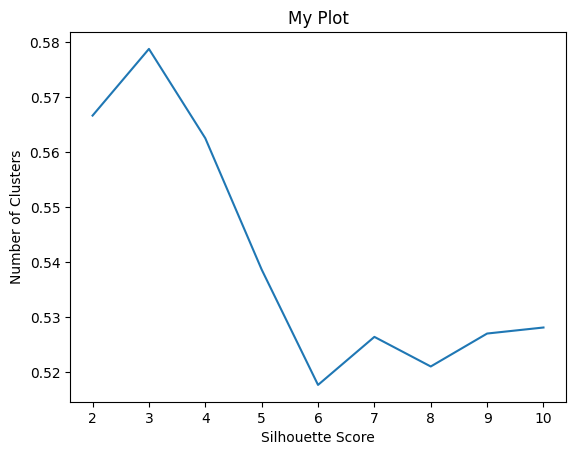

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features = merged_df[["Tons", "TAVG"]]



scores=[]
k_vals = range(2, 11)

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='random')
    kmeans.fit(features)
    silhouette_avg = silhouette_score(features, kmeans.labels_)
    scores.append(silhouette_avg)
    

fig, ax = plt.subplots()

ax.plot(k_vals, scores)


ax.set_title('My Plot')
ax.set_xlabel('Silhouette Score')
ax.set_ylabel('Number of Clusters')


plt.show()



The plot above shows that the clusters are most optimal when k = 3, so i go ahead and plot the result generated by a K-means of 3 clusters. I also mapped each datapointto its cluster and plotted the centroids of each cluster. The graph below shows no real discernable information. However, it seems t our outliers for each clusters increase in their tonnage value relative to an increase in temperature. 

/var/folders/m5/c0jw_w4s2012vgf1mwfyb3b00000gn/T/ipykernel_42270/3482247522.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['label'] = kmeans.labels_


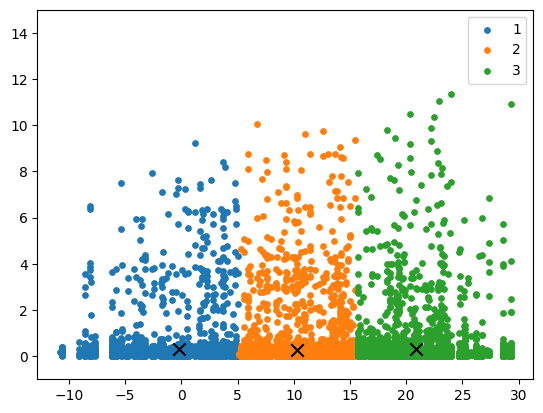

In [7]:
features = merged_df[["Tons", "TAVG"]]
kmeans = KMeans(n_clusters=3, init='random')
label =kmeans.fit_predict(features)

centroids = kmeans.cluster_centers_
labels_set = np.unique(kmeans.labels_)

features['label'] = kmeans.labels_


for i in labels_set:
    plt.scatter(features.loc[label == i, "TAVG"],
                features.loc[label == i, "Tons"], label=i+1, s=15)


plt.scatter(centroids[:, 1], centroids[:, 0], s=80, color='black', marker='x')
plt.ylim([-1, 15])
plt.legend()
plt.show()


Now i think it would be a good idea to cluster the data by trash type, as it seems using Kmeans provides no real discernable information. BUT GRAPH IT RELATIVE TO MONTH


Now i think it would be a good idea to cluster the data by trash type, as it seems using Kmeans provides no real discernable information. 

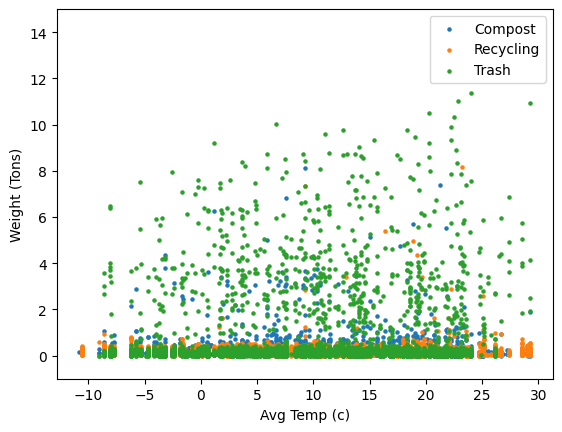

In [8]:
features = merged_df[["Tons", "TAVG"]]

label = merged_df["Material"]
labels_set = np.unique(label)

for i in labels_set:
    plt.scatter(features.loc[label == i, "TAVG"],
                features.loc[label == i, "Tons"], label=i, s=5)


plt.ylim([-1, 15])
plt.xlabel('Avg Temp (c)')  # add x label
plt.ylabel('Weight (Tons)')  # add y label
plt.legend()
plt.show()


From the graph above, we can clearly see what the client confirmed, which is that trash containers are the heaviest, but what we can see here is that trash shipments seem to be increasing in weight as the temperature increases. A possible approach to track this would be to measure the average weight collected at each temperature for each type of waste

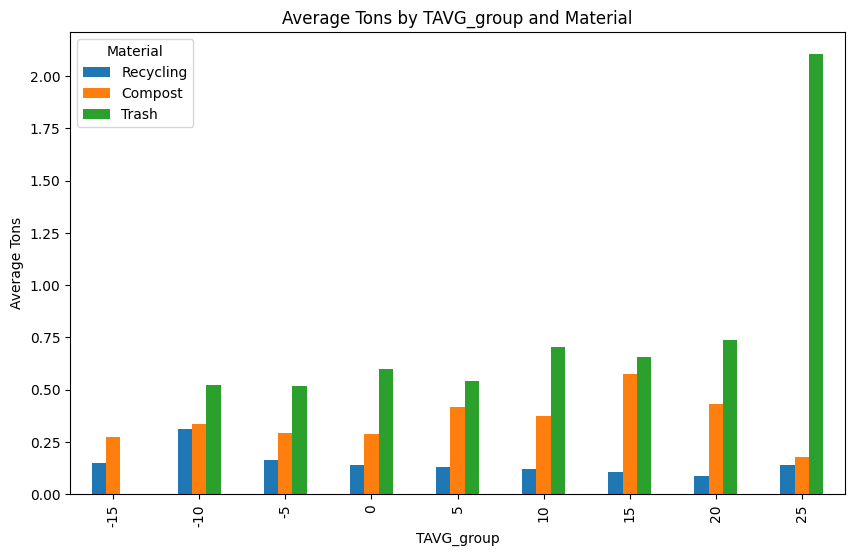

In [9]:


ranges = range(-15, 35, 5)

merged_df['TAVG_group'] = pd.cut(
    merged_df['TAVG'], bins=ranges, labels=ranges[:-1])


grouped_df = merged_df.groupby(['TAVG_group', 'Material'])[
    'Tons'].mean().unstack()

grouped_df = grouped_df.reindex(columns=['Recycling', 'Compost', 'Trash'])

grouped_df.plot(kind='bar', figsize=(10, 6))




plt.title('Average Tons by TAVG_group and Material')
plt.xlabel('TAVG_group')
plt.ylabel('Average Tons')


plt.show()


In [10]:
merged_df.head()

,Date,AWND,TAVG,TMAX,TMIN,WDF2,WSF2,Customer Key,Location,Address,Material,Tons,TAVG_group
0,7/1/2021,4.0,25.4,29.4,20.0,220.0,7.6,31903.0,BU #75 - College of Health,635 Commonwealth Ave,Recycling,0.0300,25
1,7/2/2021,6.3,18.3,20.6,15.0,50.0,9.8,31950.0,BU #99 - College of Fine Arts,855 COMMONWEALTH AVE,Recycling,0.0800,15
2,7/6/2021,6.6,24.9,33.3,20.6,270.0,12.5,31769.0,BU #2 - Student Village,10 BUICK STREET,Recycling,0.5670,20
3,7/6/2021,6.6,24.9,33.3,20.6,270.0,12.5,31946.0,BU #95 - 80 Ivy,80 IVY ST,Trash,0.0470,20
4,7/6/2021,6.6,24.9,33.3,20.6,270.0,12.5,32111.0,BU MED- 815 Albany,815 Albany Street,Compost,0.0725,20


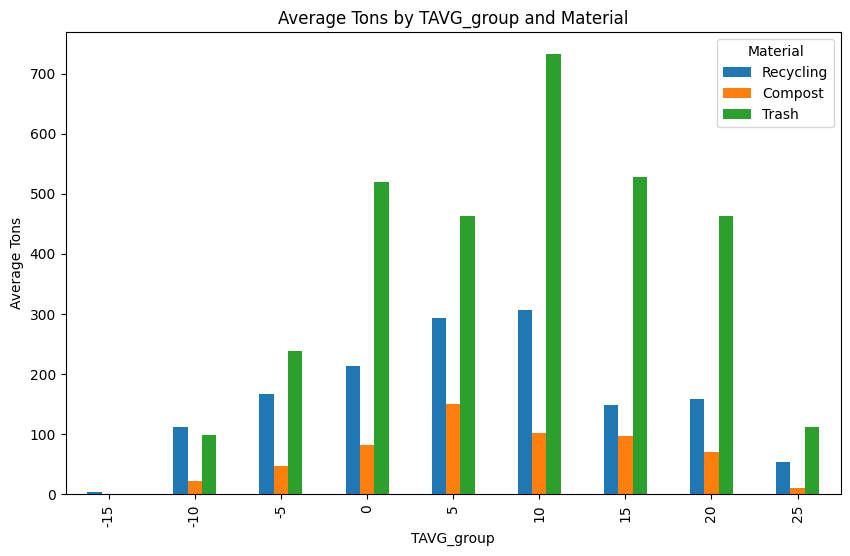

In [11]:


ranges = range(-15, 35, 5)

merged_df['TAVG_group'] = pd.cut(
    merged_df['TAVG'], bins=ranges, labels=ranges[:-1])


grouped_df = merged_df.groupby(['TAVG_group', 'Material'])[
    'Tons'].sum().unstack()

grouped_df = grouped_df.reindex(columns=['Recycling', 'Compost', 'Trash'])

grouped_df.plot(kind='bar', figsize=(10, 6))




plt.title('Average Tons by TAVG_group and Material')
plt.xlabel('TAVG_group')
plt.ylabel('Average Tons')


plt.show()


The grouped bar chart above shows that, on average, the tonnage of Trash containers increases with temperature. For the recycing containers, it seems to decrease in most cases. However for Compost, it is difficult to tell. We may need to find the pearson correlation coeficient for each container type. 

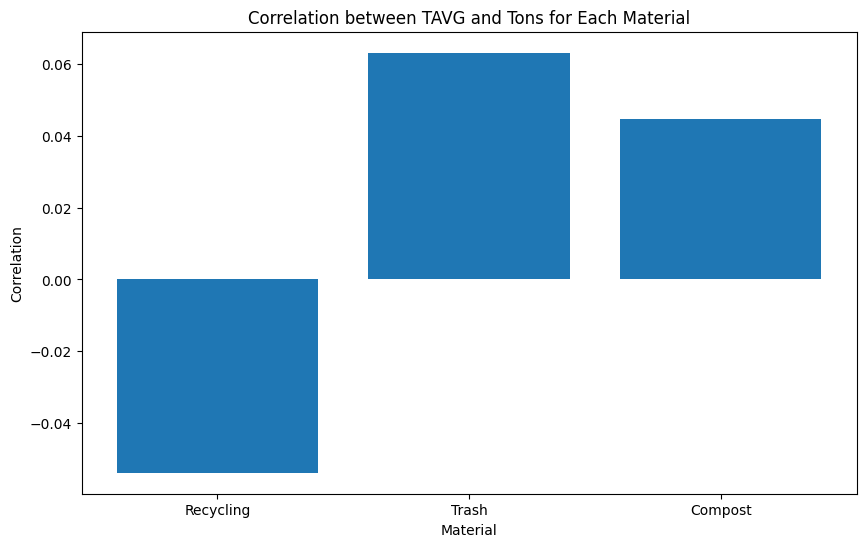

In [12]:
temp_vals_trash = merged_df[merged_df['Material'] == 'Trash']['TAVG']
temp_vals_compost = merged_df[merged_df['Material'] == 'Compost']['TAVG']
temp_vals_recycling = merged_df[merged_df['Material'] == 'Recycling']['TAVG']

tonnage_trash = merged_df[merged_df['Material'] == 'Trash']['Tons']
tonnage_compost = merged_df[merged_df['Material'] == 'Compost']['Tons']
tonnage_recycling = merged_df[merged_df['Material'] == 'Recycling']['Tons']




trash_correllation = np.corrcoef(tonnage_trash, temp_vals_trash)[0, 1]
compost_correllation = np.corrcoef(tonnage_compost, temp_vals_compost)[0, 1]
recycling_correllation = np.corrcoef(tonnage_recycling, temp_vals_recycling)[0, 1]


corr_values = [recycling_correllation,
               trash_correllation, compost_correllation]


fig, ax = plt.subplots(figsize=(10, 6))
x_data = merged_df['Material'].unique()
ax.bar(x_data, corr_values)
ax.set_xlabel('Material')
ax.set_ylabel('Correlation')
ax.set_title('Correlation between TAVG and Tons for Each Material')
plt.show()



In [13]:
print(corr_values) 

[-0.05381030920366826, 0.06314849570862917, 0.044642701315039814]


Interestingly, the bar chart above reveals more detail about recycling containers, it appears recycling tonnage goes down as temperatures increase. Wheras there seems to be a minor positive correlation between Trash/Compost tonnage with Average daily temperature. 

It seems trash tonnage increases with temperature, I am going to map tonnage to date in order to confirm that tonnage is actually increasing during summer period. 

/var/folders/m5/c0jw_w4s2012vgf1mwfyb3b00000gn/T/ipykernel_42270/2614796264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tons_trash['month'] = pd.DatetimeIndex(df_tons_trash['Date']).month


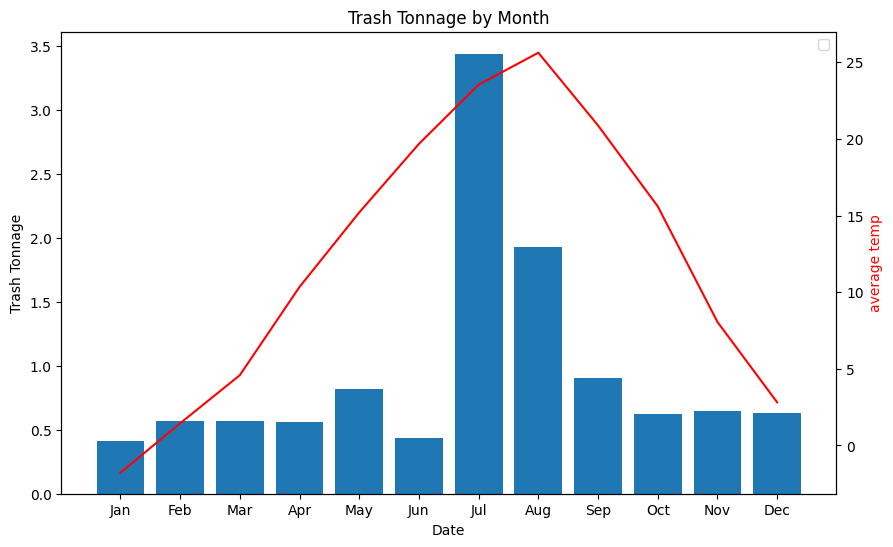

In [14]:

df_tons_trash = merged_df.loc[merged_df['Material'] == 'Trash']
df_tons_trash['month'] = pd.DatetimeIndex(df_tons_trash['Date']).month
avg_per_month = df_tons_trash.groupby(df_tons_trash['month'])['Tons'].mean()

avg_per_month.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']



temp_month_avg = df_tons_trash.groupby(
    df_tons_trash['month'])['TAVG'].mean()

x_axis = avg_per_month.index


y_axis = avg_per_month


fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.bar(x_axis, y_axis)
ax1.set_xlabel('Date')
ax1.set_ylabel('Trash Tonnage')
ax1.set_title('Trash Tonnage by Month')

ax2.set_ylabel('average temp', color= 'red')
ax2.legend(['average temp'], loc="upper right")
ax2.plot(x_axis, temp_month_avg, color='red')
plt.show()


Now lets apply the same process to recylcling and compost

/var/folders/m5/c0jw_w4s2012vgf1mwfyb3b00000gn/T/ipykernel_42270/3158712205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tons_trash['month'] = pd.DatetimeIndex(df_tons_trash['Date']).month


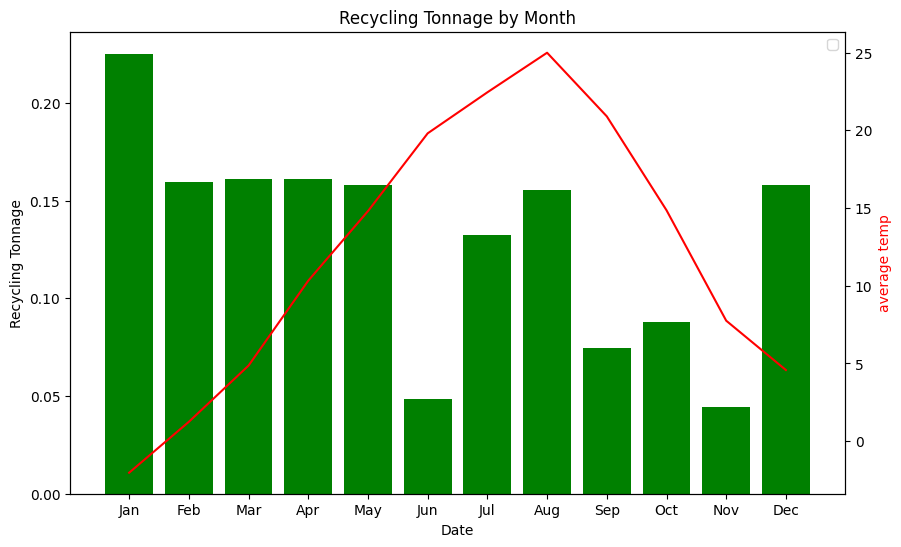

In [15]:

df_tons_trash = merged_df.loc[merged_df['Material'] == 'Recycling']
df_tons_trash['month'] = pd.DatetimeIndex(df_tons_trash['Date']).month
avg_per_month = df_tons_trash.groupby(df_tons_trash['month'])['Tons'].mean()

avg_per_month.index = ['Jan', 'Feb', 'Mar', 'Apr',
                       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


temp_month_avg = df_tons_trash.groupby(
    df_tons_trash['month'])['TAVG'].mean()

x_axis = avg_per_month.index


y_axis = avg_per_month


fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.bar(x_axis, y_axis, color= 'green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Recycling Tonnage')
ax1.set_title('Recycling Tonnage by Month')

ax2.set_ylabel('average temp', color='red')
ax2.legend(['average temp'], loc="upper right")
ax2.plot(x_axis, temp_month_avg, color='red')
plt.show()


/var/folders/m5/c0jw_w4s2012vgf1mwfyb3b00000gn/T/ipykernel_42270/1708685743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tons_trash['month'] = pd.DatetimeIndex(df_tons_trash['Date']).month


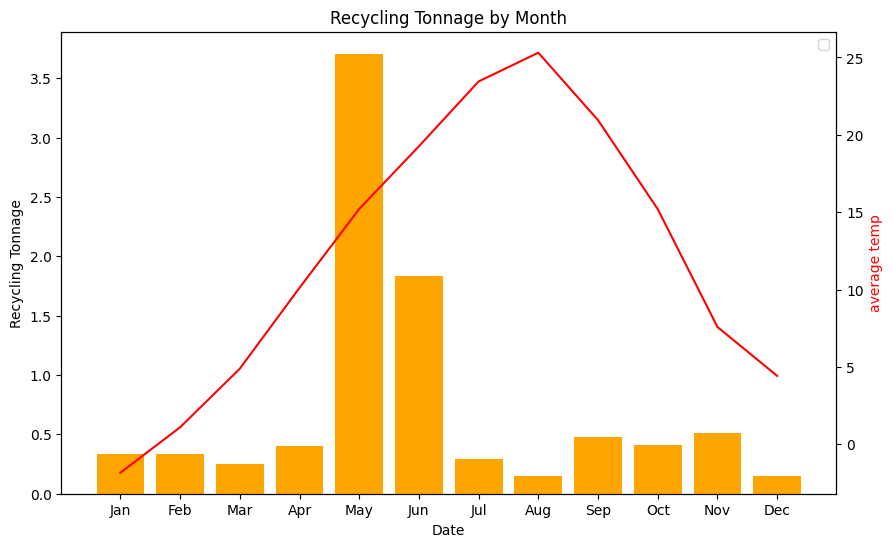

In [16]:

df_tons_trash = merged_df.loc[merged_df['Material'] == 'Compost']
df_tons_trash['month'] = pd.DatetimeIndex(df_tons_trash['Date']).month
avg_per_month = df_tons_trash.groupby(df_tons_trash['month'])['Tons'].mean()

avg_per_month.index = ['Jan', 'Feb', 'Mar', 'Apr',
                       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


temp_month_avg = df_tons_trash.groupby(
    df_tons_trash['month'])['TAVG'].mean()

x_axis = avg_per_month.index


y_axis = avg_per_month


fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.bar(x_axis, y_axis, color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Recycling Tonnage')
ax1.set_title('Recycling Tonnage by Month')

ax2.set_ylabel('average temp', color='red')
ax2.legend(['average temp'], loc="upper right")
ax2.plot(x_axis, temp_month_avg, color='red')
plt.show()


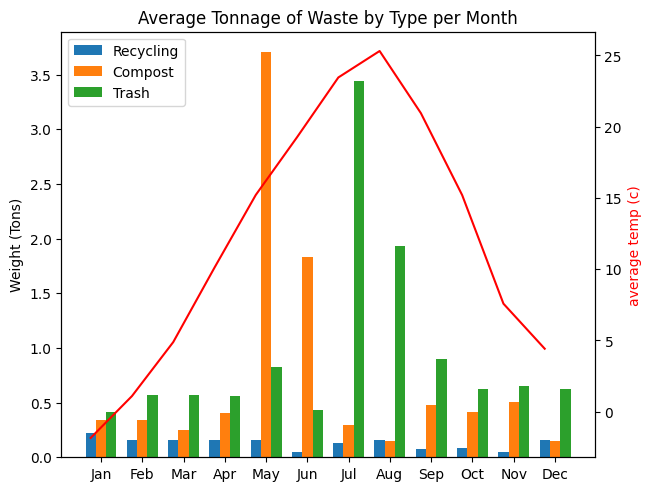

In [17]:
merged_df['month'] = pd.DatetimeIndex(merged_df['Date']).month

grouped_df = merged_df.groupby(['month', 'Material'])[
    'Tons'].mean().unstack()
x_axis = ['Jan', 'Feb', 'Mar', 'Apr',
          'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped_df = grouped_df.reindex(columns=['Recycling', 'Compost', 'Trash'])

x = np.arange(len(x_axis))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

ax2 = ax.twinx()

for attribute, measurement in grouped_df.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Weight (Tons)')
ax.set_title('Average Tonnage of Waste by Type per Month')
ax.set_xticks(x + width, x_axis)
ax.legend(loc='upper left')

ax2.set_ylabel('average temp (c)', color='red')
ax2.plot(x_axis, temp_month_avg, color='red')

plt.show()


Basedon on the graph above, it appears that more pressure is added to the network of Compost containers during the months of May and June, confirming what the client said regarding the effects of Commencement and Move out. While it seems Trash containers across the BU campus are on average showing increased tonnage during the months of Jul and Aug. Now here is the same graph but tracking total monthly tonnage

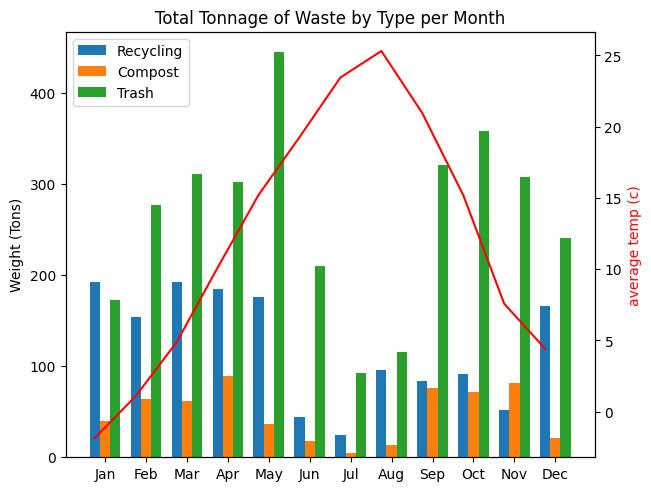

In [18]:
merged_df['month'] = pd.DatetimeIndex(merged_df['Date']).month

grouped_df = merged_df.groupby(['month', 'Material'])[
    'Tons'].sum().unstack()
x_axis = ['Jan', 'Feb', 'Mar', 'Apr',
          'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped_df = grouped_df.reindex(columns=['Recycling', 'Compost', 'Trash'])

x = np.arange(len(x_axis))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

ax2 = ax.twinx()

for attribute, measurement in grouped_df.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Weight (Tons)')
ax.set_title('Total Tonnage of Waste by Type per Month')
ax.set_xticks(x + width, x_axis)
ax.legend(loc='upper left')

ax2.set_ylabel('average temp (c)', color='red')
ax2.plot(x_axis, temp_month_avg, color='red')

plt.show()


The graph above maps total monthly tonnage per type. It can be seen that total Trash tonnage reaches its peak in May, possibly due to move out and commencement as suggested by the client. But Waste overalll decreases in the summer months of Jun, Jul and Aug, this makes sense due to the decreased campus activity during the summer. However, since their averages increased during the months of May,Jun, Jul and Aug, indicating that those who remain on campus may be more active or consuming more, resulting in a higher average tonnage per waste type per month. 




Maybe we can merge this data with another document and only look at the sites that compact the most frequently 

In [19]:
compaction_freq = pd.read_csv(
    '/Users/abdelazimlokma/Downloads/Device_Compaction_Frequency_2023-01-04_1029 - Device_Compaction_Frequency_2023-01-04_1029.csv')

merged_df.rename(columns={'Location': 'Site'}, inplace=True)


joined_data = pd.merge(compaction_freq, merged_df, on='Site', how='inner')






Now that weve joined the data, lets try regraphing the tri-bar chart again. The compaction frequency document only lists 25 sites, while the daily weights document had over 151 sites on record

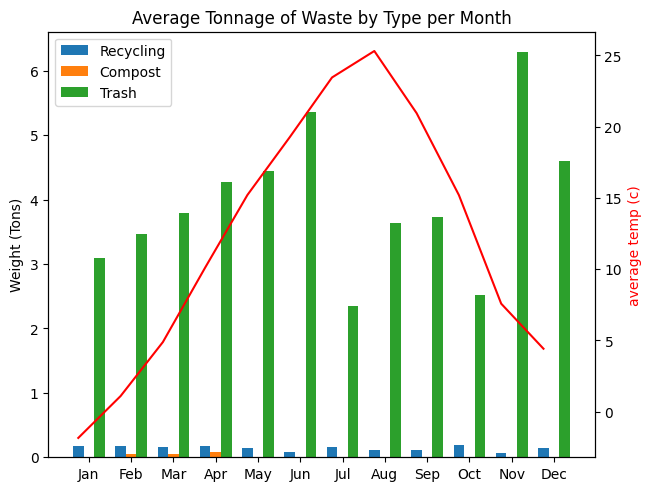

In [20]:
joined_data['month'] = pd.DatetimeIndex(joined_data['Date']).month

grouped_df = joined_data.groupby(['month', 'Material'])[
    'Tons'].mean().unstack()
x_axis = ['Jan', 'Feb', 'Mar', 'Apr',
          'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped_df = grouped_df.reindex(columns=['Recycling', 'Compost', 'Trash'])

x = np.arange(len(x_axis))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

ax2 = ax.twinx()

for attribute, measurement in grouped_df.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Weight (Tons)')
ax.set_title('Average Tonnage of Waste by Type per Month')
ax.set_xticks(x + width, x_axis)
ax.legend(loc='upper left')

ax2.set_ylabel('average temp (c)', color='red')
ax2.plot(x_axis, temp_month_avg, color='red')

plt.show()


Now lets see total tonnage for this smaller subset of sites:

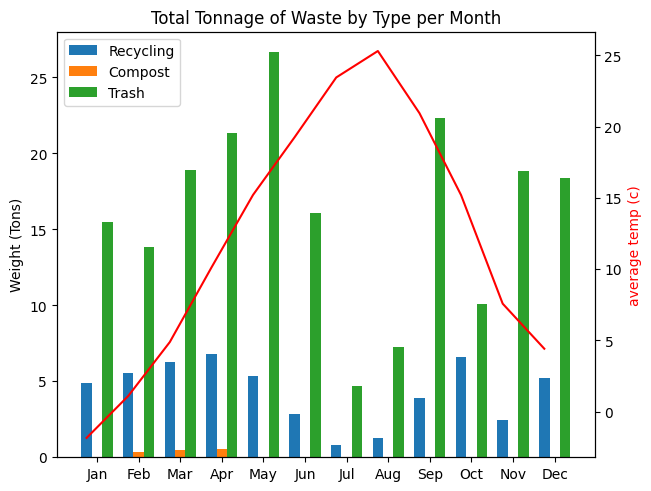

In [21]:
joined_data['month'] = pd.DatetimeIndex(joined_data['Date']).month

grouped_df = joined_data.groupby(['month', 'Material'])[
    'Tons'].sum().unstack()
x_axis = ['Jan', 'Feb', 'Mar', 'Apr',
          'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped_df = grouped_df.reindex(columns=['Recycling', 'Compost', 'Trash'])

x = np.arange(len(x_axis))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

ax2 = ax.twinx()

for attribute, measurement in grouped_df.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Weight (Tons)')
ax.set_title('Total Tonnage of Waste by Type per Month')
ax.set_xticks(x + width, x_axis)
ax.legend(loc='upper left')

ax2.set_ylabel('average temp (c)', color='red')
ax2.plot(x_axis, temp_month_avg, color='red')

plt.show()


I'd like to visualize how the tonnage changes across campus, so ill geocode the adresses of all the containers, converting their adresses into corrdinates so that I can map it to a folium map

In [22]:
from geopy import Nominatim
from tqdm import tqdm

from geopy.extra.rate_limiter import RateLimiter

merged_df['Processed Address'] = merged_df['Address'].str.lower() + ', Boston, MA'

unique_addresses = merged_df['Processed Address'].unique()

unique_addresses = pd.DataFrame(unique_addresses, columns=['Processed Address'])

geocoded_adresses = pd.read_csv('unique_addresses_geocodio_bf195406ff7fbdd667ae13ba0a263c2330df6d50.csv')

subset_cols = ["Processed Address", "Latitude", "Longitude", "Number", "Street", "City"]
geocoded_adresses = geocoded_adresses[subset_cols]


geocoded_adresses.head()

,Processed Address,Latitude,Longitude,Number,Street,City
0,"635 commonwealth ave, Boston, MA",42.349883,-71.101988,635,Commonwealth Ave,Boston
1,"855 commonwealth ave, Boston, MA",42.351350,-71.113815,855,Commonwealth Ave,Boston
2,"10 buick street , Boston, MA",42.352398,-71.115972,10,Buick St,Boston
3,"80 ivy st, Boston, MA",42.346936,-71.107394,80,Ivy St,Brookline
4,"815 albany street, Boston, MA",42.332384,-71.075471,815,Albany St,Roxbury


now its time to merge the dataframe with merged_df dataframe on the Processed Address.

In [50]:
geocoded_df = pd.merge(merged_df, geocoded_adresses, on='Processed Address', how='left')



,Date,AWND,TAVG,TMAX,TMIN,WDF2,WSF2,Customer Key,Site,Address,Material,Tons,TAVG_group,month,Processed Address,Latitude,Longitude,Number,Street,City
0,7/1/2021,4.0,25.4,29.4,20.0,220.0,7.6,31903.0,BU #75 - College of Health,635 Commonwealth Ave,Recycling,0.0300,25,7,"635 commonwealth ave, Boston, MA",42.349883,-71.101988,635,Commonwealth Ave,Boston
7,7/8/2021,4.0,20.6,21.7,17.8,260.0,13.0,31903.0,BU #75 - College of Health,635 Commonwealth Ave,Recycling,0.0300,20,7,"635 commonwealth ave, Boston, MA",42.349883,-71.101988,635,Commonwealth Ave,Boston
24,7/9/2021,4.7,19.6,25.6,17.2,50.0,11.2,31903.0,BU #75 - College of Health,635 Commonwealth Ave,Recycling,0.0470,15,7,"635 commonwealth ave, Boston, MA",42.349883,-71.101988,635,Commonwealth Ave,Boston
70,7/15/2021,2.8,23.4,26.1,21.7,70.0,5.8,31903.0,BU #75 - College of Health,635 Commonwealth Ave,Recycling,0.3125,20,7,"635 commonwealth ave, Boston, MA",42.349883,-71.101988,635,Commonwealth Ave,Boston
137,7/22/2021,3.6,22.3,25.6,18.3,220.0,7.6,31903.0,BU #75 - College of Health,635 Commonwealth Ave,Recycling,0.0760,20,7,"635 commonwealth ave, Boston, MA",42.349883,-71.101988,635,Commonwealth Ave,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17633,6/27/2022,5.8,22.7,25.0,19.4,210.0,10.3,31903.0,BU #75 - College of Health,635 Commonwealth Ave,Trash,0.0000,20,6,"635 commonwealth ave, Boston, MA",42.349883,-71.101988,635,Commonwealth Ave,Boston
17634,6/27/2022,5.8,22.7,25.0,19.4,210.0,10.3,31903.0,BU #75 - College of Health,635 Commonwealth Ave,Recycling,0.0000,20,6,"635 commonwealth ave, Boston, MA",42.349883,-71.101988,635,Commonwealth Ave,Boston
17693,6/28/2022,4.0,21.1,24.4,16.7,110.0,7.2,31903.0,BU #75 - College of Health,635 Commonwealth Ave,Trash,0.1000,20,6,"635 commonwealth ave, Boston, MA",42.349883,-71.101988,635,Commonwealth Ave,Boston
17727,6/29/2022,3.3,21.5,28.3,17.2,300.0,7.6,31903.0,BU #75 - College of Health,635 Commonwealth Ave,Trash,0.0900,20,6,"635 commonwealth ave, Boston, MA",42.349883,-71.101988,635,Commonwealth Ave,Boston


In [45]:
monthly_tonnage_by_address = geocoded_df.groupby(['Site', 'month', 'Material'])['Tons'].sum()


In [82]:
import numpy as np
import folium
from folium.plugins import HeatMapWithTime
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



import folium
from folium.plugins import HeatMapWithTime
import numpy as np

# Define the map center
map_center = [42.3601, -71.0589]

# Create the base map
dynamic_heat_map = folium.Map(location=map_center, zoom_start=12)

# Add the circle markers for each address
for index, row in geocoded_df.groupby('Address').first().iterrows():
    folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=2,
            fill_opacity=.4,
            color='black',
            tooltip= row['Site'] 
        ).add_to(dynamic_heat_map)
    

# create a HeatMapWithTime layer
heat_data = []
for Date in geocoded_df['Date'].unique():
    data = geocoded_df.loc[geocoded_df['Date'] == Date, ['Latitude', 'Longitude', 'Tons']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist()
    heat_data.append(data)

# Get the max value of the heat data
max_value = np.max([np.max(data) for data in heat_data])

# Create a custom colormap based on the max value
cmap = folium.LinearColormap(
    [  'blue', 'green','yellow', 'orange','red'], 
    vmin=0, vmax=max_value, 
    caption='Tons'
)

# Create the heatmap layer
heat_layer = HeatMapWithTime(
    data=heat_data,
    index=geocoded_df['Date'].unique().tolist(),
    auto_play=True,
    use_local_extrema=False,
    name='Tons',
    radius=16,
).add_to(dynamic_heat_map)

# Add the colormap legend to the map
cmap.add_to(dynamic_heat_map)

# Display the map
dynamic_heat_map




In [84]:
dynamic_heat_map.save('daily_dynamic_heat_map.html')

Now i'm going to save it as a GIF

In [80]:
import folium
from folium.plugins import HeatMapWithTime
import numpy as np

# Define the map center
map_center = [42.3601, -71.0589]

# Create the base map
monthly_dynamic_heat_map = folium.Map(location=map_center, zoom_start=12)

heat_data = []
for Date in geocoded_df['month'].unique():
    data = geocoded_df.loc[geocoded_df['month'] == Date, ['Latitude', 'Longitude', 'Tons']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist()
    heat_data.append(data)

# Add the circle markers for each address
for index, row in geocoded_df.groupby('Address').first().iterrows():
    folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=2,
            fill_opacity=0,
            color='black',
            tooltip= row['Site'] 
        ).add_to(monthly_dynamic_heat_map)


# Get the max value of the heat data
max_value = np.max([np.max(data) for data in heat_data])

# Create a custom colormap based on the max value
cmap = folium.LinearColormap(
     [  'blue', 'green','yellow', 'orange','red'], 
    vmin=0, vmax=max_value, 
    caption='Tons'
)

# Create the heatmap layer
heat_layer = HeatMapWithTime(
    data=heat_data,
    index=['July', 'August', 'September', 'October', 'November', 'December', 
             'January', 'February', 'March', 'April', 'May', 'June'],
    auto_play=True,
    use_local_extrema=False,
    name='Tons',
    radius=25,
).add_to(monthly_dynamic_heat_map)



# Add the colormap legend to the map
cmap.add_to(monthly_dynamic_heat_map)

# Display the map
monthly_dynamic_heat_map




In [83]:

monthly_dynamic_heat_map.save('monthly_dynamic_heat_map.html')

Myabe it would be better to animate this data as a bar graph. 

I will make a graph showing each container on the X axis, and the tonnages on the Y axis, with the color of the bar representing the type of waste produced. 

MovieWriter imagemagick unavailable; using Pillow instead.


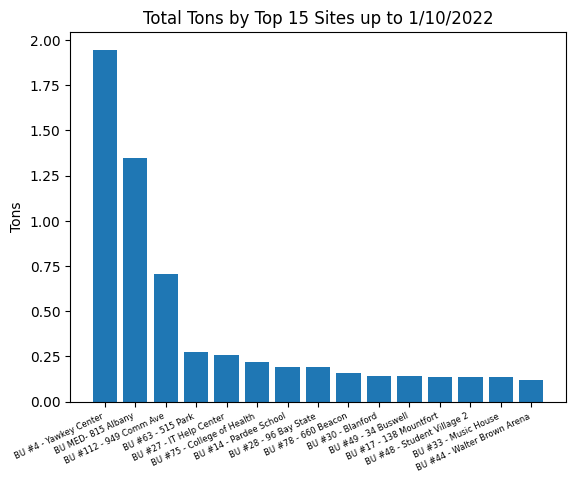

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assuming your geocoded_df is already loaded as a pandas DataFrame
# You can group the data by date and site, and calculate the total tons
df_grouped = geocoded_df.groupby(['Date', 'Site', 'Material'])['Tons'].sum().reset_index()

# Create a figure and an axes object
fig, ax = plt.subplots()

type_colors = {'Type A': 'red', 'Type B': 'green', 'Type C': 'blue'}


# Define the function to update the bar graph for each frame of the animation
def update(frame):
    N = 15
    
    df_filtered = df_grouped[df_grouped['Date'] <= frame]
    
    df_agg = df_filtered.groupby('Site')['Tons'].sum().reset_index()
    
    df_sorted = df_agg.sort_values(by='Tons', ascending=False)

    df_top = df_sorted.iloc[:N]

    ax.clear()

    ax.bar(df_top['Site'], df_top['Tons'])

    ax.set_title(f'Total Tons by Top {N} Sites up to {frame}')
    
    ax.set_ylabel('Tons')

    plt.xticks(rotation=25, ha='right')
    
    ax.tick_params(axis='x', labelsize=6) 



# Create the animation object
animation = FuncAnimation(fig, update, frames=sorted(set(df_grouped['Date'])), interval=1000)

# Save the animation as an mp4 video file
animation.save('top_15_sum.gif', writer='imagemagick', fps=10)

# Show the animation in the Jupyter notebook (optional)
# plt.rcParams['animation.html'] = 'jshtml'
# animation


an updated graph

MovieWriter imagemagick unavailable; using Pillow instead.


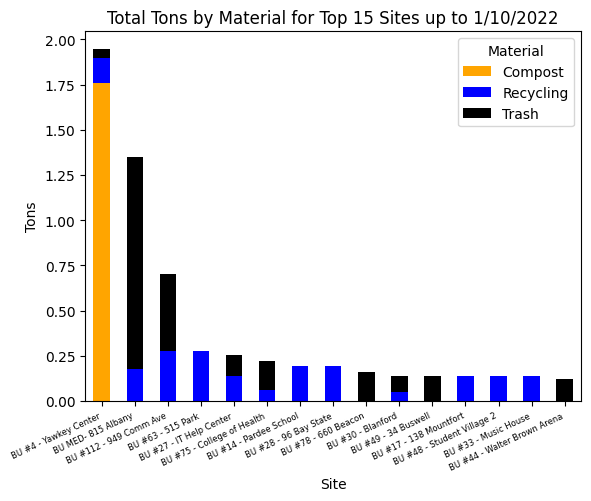

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assuming your geocoded_df is already loaded as a pandas DataFrame
# You can group the data by date, site, and material, and calculate the total tons
df_grouped = geocoded_df.groupby(['Date', 'Site', 'Material'])['Tons'].sum().reset_index()

# Create a figure and an axes object
fig, ax = plt.subplots()

# Define the number of sites to display
N = 15

# Define a list of colors for each material
color_dict = {'Trash': 'black', 'Recycling': 'blue', 'Compost': 'orange'}

# Define the function to update the bar graph for each frame of the animation
def update(frame):
    
    # Filter the dataframe to include only rows up to the current frame
    df_filtered = df_grouped[df_grouped['Date'] <= frame]
    
    # Group the filtered dataframe by site and material, and sum the tons for each group
    df_agg = df_filtered.groupby(['Site', 'Material'])['Tons'].sum().reset_index()
    
    # Pivot the aggregated dataframe so that the materials become columns
    df_pivot = df_agg.pivot(index='Site', columns='Material', values='Tons')
    
    # Sort the sites by total tons in descending order and keep only the top N sites
    df_sorted = df_pivot.sum(axis=1).sort_values(ascending=False).head(N)
    df_top = df_pivot.loc[df_sorted.index]
    
    # Clear the previous plot
    ax.clear()
    
    # Create a stacked bar chart for the top N sites
    df_top.plot(kind='bar', stacked=True, ax=ax, color=[color_dict[c] for c in df_top.columns])
    
    # Set the title and y-axis label
    ax.set_title(f'Total Tons by Material for Top {N} Sites up to {frame}')
    ax.set_ylabel('Tons')
    
    # Rotate the x-axis labels for better visibility
    plt.xticks(rotation=25, ha='right')
    
    # Adjust the font size of the x-axis labels
    ax.tick_params(axis='x', labelsize=6)

# Create the animation object
animation = FuncAnimation(fig, update, frames=sorted(set(df_grouped['Date'])), interval=1000)

# Save the animation as a GIF file
animation.save('top_15_material.gif', writer='imagemagick', fps=10)


Lets analyze some factors about waste generation throughout the year. First I want to find the correlation between temp and waste but only for spring and fall (rising and falling temps)

In [62]:
geocoded_df

df_spring = geocoded_df[geocoded_df['month'].isin([1,2,3,4,5])]
df_fall = geocoded_df[geocoded_df['month'].isin([9,10,11,12])]

corr_matrix_spring = df_spring[['TAVG', 'Tons']].corr()
corr_value_spring = corr_matrix_spring.iloc[0, 1]
print("Correlation between 'Tons' and 'TAVG' for the Spring Semester is:", corr_value_spring)

corr_matrix_fall = df_fall[['TAVG', 'Tons']].corr()
corr_value_fall = corr_matrix_fall.iloc[0, 1]
print("Correlation between 'Tons' and 'TAVG' for the Fall Semester is:", corr_value_fall)



Correlation between 'Tons' and 'TAVG' for the Spring Semester is: 0.0163525996706135
Correlation between 'Tons' and 'TAVG' for the Fall Semester is: 0.01784711947041475


Lets graph the results by waste type for Spring:

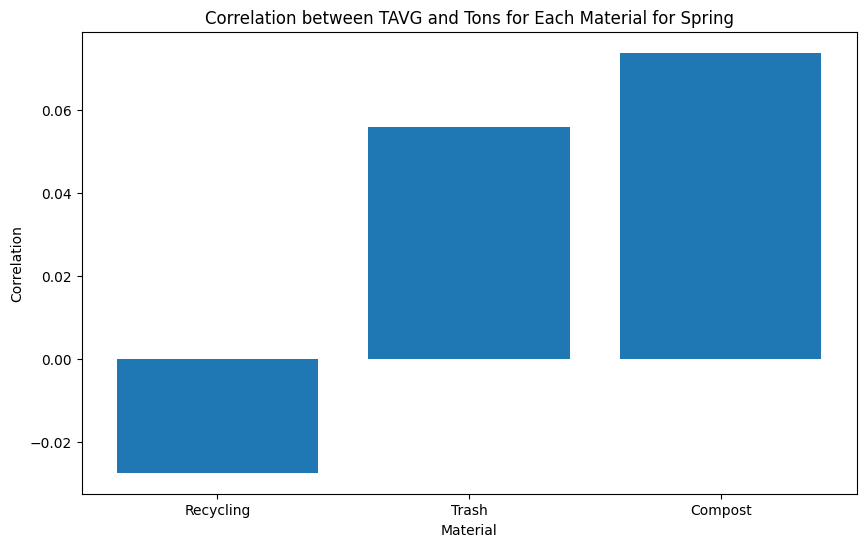

In [63]:
temp_vals_trash = df_spring[df_spring['Material'] == 'Trash']['TAVG']
temp_vals_compost = df_spring[df_spring['Material'] == 'Compost']['TAVG']
temp_vals_recycling = df_spring[df_spring['Material'] == 'Recycling']['TAVG']

tonnage_trash = df_spring[df_spring['Material'] == 'Trash']['Tons']
tonnage_compost = df_spring[df_spring['Material'] == 'Compost']['Tons']
tonnage_recycling = df_spring[df_spring['Material'] == 'Recycling']['Tons']




trash_correllation = np.corrcoef(tonnage_trash, temp_vals_trash)[0, 1]
compost_correllation = np.corrcoef(tonnage_compost, temp_vals_compost)[0, 1]
recycling_correllation = np.corrcoef(tonnage_recycling, temp_vals_recycling)[0, 1]


corr_values = [recycling_correllation,
               trash_correllation, compost_correllation]


fig, ax = plt.subplots(figsize=(10, 6))
x_data = merged_df['Material'].unique()
ax.bar(x_data, corr_values)
ax.set_xlabel('Material')
ax.set_ylabel('Correlation')
ax.set_title('Correlation between TAVG and Tons for Each Material for Spring')
plt.show()

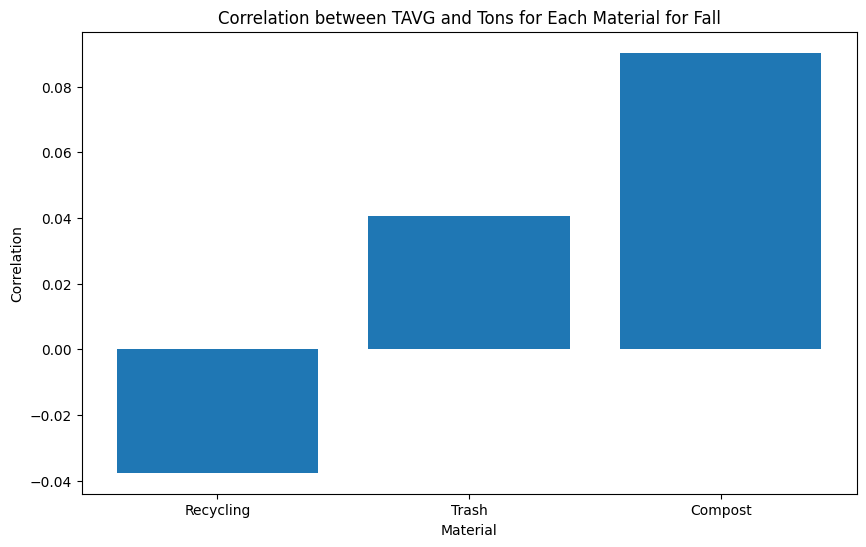

In [64]:
temp_vals_trash = df_fall[df_fall['Material'] == 'Trash']['TAVG']
temp_vals_compost = df_fall[df_fall['Material'] == 'Compost']['TAVG']
temp_vals_recycling = df_fall[df_fall['Material'] == 'Recycling']['TAVG']

tonnage_trash = df_fall[df_fall['Material'] == 'Trash']['Tons']
tonnage_compost = df_fall[df_fall['Material'] == 'Compost']['Tons']
tonnage_recycling = df_fall[df_fall['Material'] == 'Recycling']['Tons']




trash_correllation = np.corrcoef(tonnage_trash, temp_vals_trash)[0, 1]
compost_correllation = np.corrcoef(tonnage_compost, temp_vals_compost)[0, 1]
recycling_correllation = np.corrcoef(tonnage_recycling, temp_vals_recycling)[0, 1]


corr_values = [recycling_correllation,
               trash_correllation, compost_correllation]


fig, ax = plt.subplots(figsize=(10, 6))
x_data = merged_df['Material'].unique()
ax.bar(x_data, corr_values)
ax.set_xlabel('Material')
ax.set_ylabel('Correlation')
ax.set_title('Correlation between TAVG and Tons for Each Material for Fall')
plt.show()

Nothing worth noting, still weak correlations, lets see how the waste being generated differs between both semesters.
Lets also see which semester shows more output and by how much

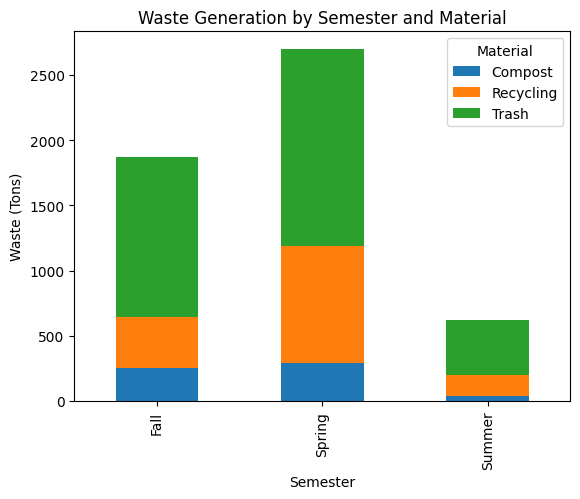

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new column 'Season' based on the 'month' column
season_map = {1: 'Spring', 2: 'Spring', 3: 'Spring', 4: 'Spring', 5: 'Spring',
              6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',
              11: 'Fall', 12: 'Fall'}
geocoded_df['Season'] = geocoded_df['month'].map(season_map)

# Group by 'Season' and 'Material', and sum the 'Tons' column
df_grouped = geocoded_df.groupby(['Season', 'Material'])['Tons'].sum().reset_index()

# Pivot the table to have 'Material' as columns and 'Season' as index
df_pivot = df_grouped.pivot(index='Season', columns='Material', values='Tons')

# Create the stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True)

# Set the axis labels and title
ax.set_xlabel('Semester')
ax.set_ylabel('Waste (Tons)')
ax.set_title('Waste Generation by Semester and Material')
plt.show()


and now lets see the percentages of waste material and how they differ

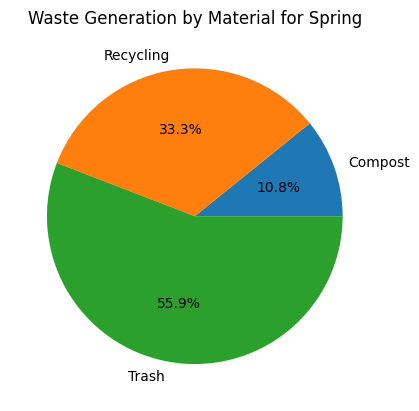

In [66]:
spring_pie_df = df_spring.groupby('Material')['Tons'].sum()

# Create a pie chart
plt.pie(spring_pie_df.values, labels=spring_pie_df.index, autopct='%1.1f%%')

# Add a title
plt.title('Waste Generation by Material for Spring')

# Show the plot
plt.show()

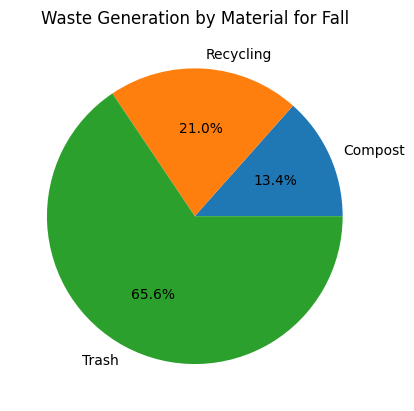

In [67]:
fall_pie_df = df_fall.groupby('Material')['Tons'].sum()

# Create a pie chart
plt.pie(fall_pie_df.values, labels=fall_pie_df.index, autopct='%1.1f%%')

# Add a title
plt.title('Waste Generation by Material for Fall')

# Show the plot
plt.show()

I want to see the percentage difference in total waste outputted

In [87]:
fall_waste = df_fall['Tons'].sum()

spring_waste = df_spring['Tons'].sum()

percentage_diff = ((spring_waste -fall_waste ) / ((spring_waste + fall_waste )  / 2)) * 100

print(percentage_diff)

36.214534556762764


This means that the amount of waste generated in the fall season is 36.21% lower than the amount generated in the spring season.
Lets also see the top sites for each semester

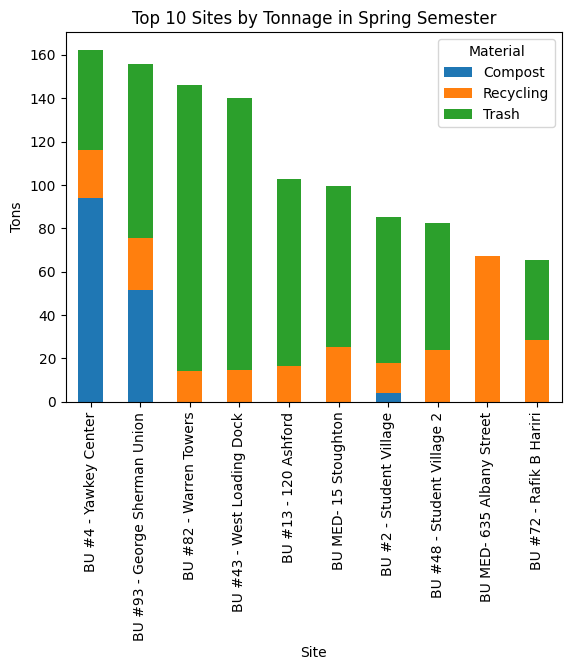

In [118]:
# Group by site and material, and sum the tons
df_grouped = geocoded_df.loc[geocoded_df['month'].isin([1,2,3,4,5])].groupby(['Site', 'Material'])['Tons'].sum().reset_index()

# Get the top 25 sites by total tonnage for the spring season
df_top25 = df_grouped.groupby('Site')['Tons'].sum().nlargest(10).index.tolist()
df_top25 = df_grouped.loc[df_grouped['Site'].isin(df_top25)]

# Pivot the data and create a stacked bar chart
df_pivot = df_top25.pivot(index='Site', columns='Material', values='Tons').fillna(0)
df_pivot = df_pivot.reindex(df_pivot.sum(axis=1).sort_values(ascending=False).index)  # sort by total tonnage
ax = df_pivot.plot(kind='bar', stacked=True)
ax.set_ylabel('Tons')
ax.set_title('Top 10 Sites by Tonnage in Spring Semester')
plt.show()


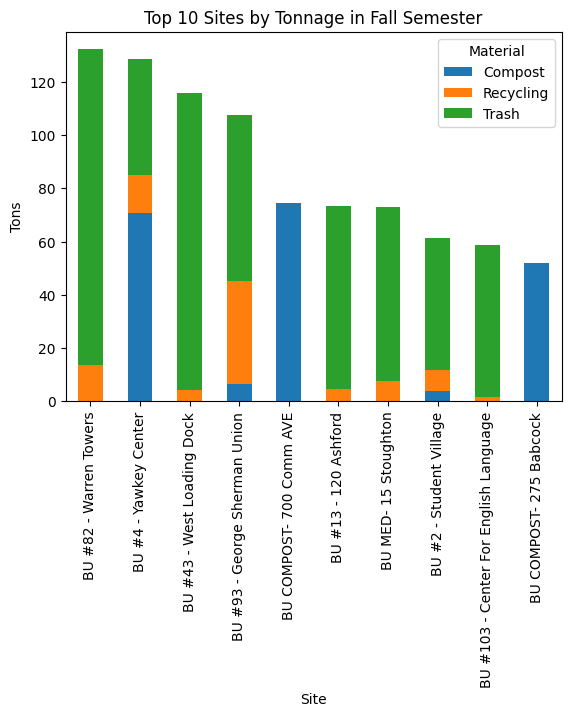

In [117]:
# Group by site and material, and sum the tons
df_grouped = geocoded_df.loc[geocoded_df['month'].isin([9,10,11,12])].groupby(['Site', 'Material'])['Tons'].sum().reset_index()

# Get the top 25 sites by total tonnage for the spring season
df_top25 = df_grouped.groupby('Site')['Tons'].sum().nlargest(10).index.tolist()
df_top25 = df_grouped.loc[df_grouped['Site'].isin(df_top25)]

# Pivot the data and create a stacked bar chart
df_pivot = df_top25.pivot(index='Site', columns='Material', values='Tons').fillna(0)
df_pivot = df_pivot.reindex(df_pivot.sum(axis=1).sort_values(ascending=False).index)  # sort by total tonnage
ax = df_pivot.plot(kind='bar', stacked=True)
ax.set_ylabel('Tons')
ax.set_title('Top 10 Sites by Tonnage in Fall Semester')
plt.show()
